In [84]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torch import nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Hp\AppData\Local\Temp\ipykernel_11468\2890198716.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [85]:
training = torchvision.datasets.CIFAR10('./data',train=True,download=True)
testing =  torchvision.datasets.CIFAR10('./data',train=False,download=True)


Training_Image = torch.from_numpy(training.data).permute(0,3, 1, 2).float()
Training_Labels = torch.LongTensor(training.targets)
Training_Image = Training_Image / 255

Testing_Image = torch.from_numpy(testing.data).permute(0,3, 1, 2).float()
Testing_Labels =  torch.LongTensor(testing.targets)
Testing_Image = Testing_Image/255

Files already downloaded and verified
Files already downloaded and verified


In [86]:
train_data = TensorDataset(Training_Image,Training_Labels)
test_data  = TensorDataset(Testing_Image,Testing_Labels)

Train_Loader =  DataLoader(train_data,batch_size=train_data.tensors[0].shape[0],shuffle=True,drop_last=True)
Test_Loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [87]:
class AE(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.enc = nn.Sequential(
            
            nn.Conv2d(3,16,4,padding=1,stride=2),
            nn.ReLU(),
            
            nn.Conv2d(16,32,4,padding=1,stride=2),
            nn.ReLU(),
            
            
            nn.Conv2d(32,64,4,padding=1,stride=2),
            nn.ReLU(),
            
        )
        
        self.dec = nn.Sequential(
            
            nn.ConvTranspose2d(64,32,4,padding=1,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,4,padding=1,stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,4,padding=1,stride=2),
            nn.ReLU()
         )
        
    def forward(self,x):
        return self.dec(self.enc(x))
    

In [88]:
net = AE()
lossfun = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=.001)
lossf = []       

In [89]:
for epoch in range(120):
    
    X,Y = next(iter(Train_Loader))
    
    Yhat = net(X)
    
    lossf = lossfun(Yhat,X)
    
    optimizer.zero_grad()
    
    lossf.backward()
    
    optimizer.step()
    
    print("Epoch done",epoch,lossf.item())

    

Epoch done 0 0.2504724860191345
Epoch done 1 0.24896331131458282
Epoch done 2 0.2469051629304886
Epoch done 3 0.24362051486968994
Epoch done 4 0.2383275032043457
Epoch done 5 0.2299630492925644
Epoch done 6 0.21710076928138733
Epoch done 7 0.19876867532730103
Epoch done 8 0.17690490186214447
Epoch done 9 0.17087377607822418
Epoch done 10 0.17317421734333038
Epoch done 11 0.1538795828819275
Epoch done 12 0.13871058821678162
Epoch done 13 0.13358469307422638
Epoch done 14 0.1309451013803482
Epoch done 15 0.12590689957141876
Epoch done 16 0.11928442865610123
Epoch done 17 0.11508625000715256
Epoch done 18 0.11420251429080963
Epoch done 19 0.11088258028030396
Epoch done 20 0.10488329082727432
Epoch done 21 0.10103101283311844
Epoch done 22 0.09928560256958008
Epoch done 23 0.09686329215765
Epoch done 24 0.09304402023553848
Epoch done 25 0.08966528624296188
Epoch done 26 0.08802451938390732
Epoch done 27 0.08570196479558945
Epoch done 28 0.08169610798358917
Epoch done 29 0.07848751544952393

In [ ]:
## show some random examples

# get some data
X,y = next(iter(Test_Loader))

# forward pass and loss

net.eval() # switch to test mode
yHat = net(X)


fig,axs = plt.subplots(2,10,figsize=(14,4))

for i in range(10):
  pic = yHat[i,:,:,:].detach().numpy().transpose((1,2,0))
  pic = pic/2 + .5 # undo normalization
  axs[0,i].imshow(pic)
  axs[0,i].set_title(f'[ {np.min(pic):.2f}, {np.max(pic):.2f} ]',fontsize=10)
  axs[0,i].axis('off')

  pic = X[i,:,:,:].detach().numpy().transpose((1,2,0))
  pic = pic/2 + .5 # undo normalization
  axs[1,i].imshow(pic)
  axs[1,i].set_title(f'[ {np.min(pic):.2f}, {np.max(pic):.2f} ]',fontsize=10)
  axs[1,i].axis('off')

  
plt.show()

In [91]:
X,y = next(iter(Test_Loader))

# forward pass and loss

net.eval() # switch to test mode
yHat = net(X)

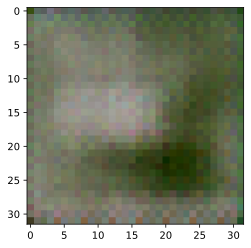

In [92]:
plt.imshow(yHat[5,:,:,:].detach().numpy().transpose((1,2,0)))